# Machine Learning
## After we crawled, extracted, processed and visualised the data, we are going to preform different machine learning algorithms 

#### Inital imports

In [33]:
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [34]:
games_df = pd.read_csv("games_analyzed_table.csv", sep=",")
games_df.drop(
    [
        "winner_id",
        "p1_id",
        "p2_id",
        "diff_win",
        "points_diff",
        "p1_sets",
        "p2_sets",
        "Unnamed: 0",
        "match_id",
        "match_type",
        "date",
        "p1_name",
        "p2_name",
        "p1_club",
        "p2_club",
        "p1_points_gained",
        "p2_points_gained",
    ],
    axis=1,
    inplace=True,
)

games_df

,p1_rank,p1_home,p2_rank,p2_home,p1_prevwins,p2_prevwins,p1_form,p2_form,p1_win,p2_win,diff_positive
0,1807.8,1.0,1712.4,0.0,8,1,7.5,-21.0,0,1,1
1,1800.3,0.0,1071.1,1.0,2,0,6.0,-2.0,1,0,1
2,1800.3,0.0,1133.6,1.0,1,0,6.0,-3.0,1,0,1
3,1800.3,1.0,1057.6,0.0,1,0,3.0,-1.0,1,0,1
4,1800.3,1.0,1368.9,0.0,7,0,1.5,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
40356,0.0,1.0,435.5,0.0,0,0,0.0,0.0,1,0,0
40357,0.0,1.0,424.0,0.0,0,0,0.0,0.0,1,0,0
40358,0.0,1.0,331.0,0.0,0,0,0.0,0.0,0,1,0
40359,0.0,1.0,307.0,0.0,0,0,0.0,0.0,1,0,0


In [35]:
games_df.fillna(0, inplace=True)
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40361 entries, 0 to 40360
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   p1_rank        40361 non-null  float64
 1   p1_home        40361 non-null  float64
 2   p2_rank        40361 non-null  float64
 3   p2_home        40361 non-null  float64
 4   p1_prevwins    40361 non-null  int64  
 5   p2_prevwins    40361 non-null  int64  
 6   p1_form        40361 non-null  float64
 7   p2_form        40361 non-null  float64
 8   p1_win         40361 non-null  int64  
 9   p2_win         40361 non-null  int64  
 10  diff_positive  40361 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 3.4 MB


### At this point we only need these specific columns:
#### p1_rank, p1_home, p2_rank, p2_home, p1_prevwins, p2_prevwins, p1_form, p2_form, p1_win, p2_win

In [36]:
games_df["is_p1_win"] = games_df["p1_win"]
games_df.drop(["p1_win", "p2_win"], axis=1, inplace=True)

In [37]:
games_df

,p1_rank,p1_home,p2_rank,p2_home,p1_prevwins,p2_prevwins,p1_form,p2_form,diff_positive,is_p1_win
0,1807.8,1.0,1712.4,0.0,8,1,7.5,-21.0,1,0
1,1800.3,0.0,1071.1,1.0,2,0,6.0,-2.0,1,1
2,1800.3,0.0,1133.6,1.0,1,0,6.0,-3.0,1,1
3,1800.3,1.0,1057.6,0.0,1,0,3.0,-1.0,1,1
4,1800.3,1.0,1368.9,0.0,7,0,1.5,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...
40356,0.0,1.0,435.5,0.0,0,0,0.0,0.0,0,1
40357,0.0,1.0,424.0,0.0,0,0,0.0,0.0,0,1
40358,0.0,1.0,331.0,0.0,0,0,0.0,0.0,0,0
40359,0.0,1.0,307.0,0.0,0,0,0.0,0.0,0,1


In [38]:
X = games_df.drop("is_p1_win", axis=1)
y = games_df["is_p1_win"]

In [39]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [40]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression
#### The first model we will use

In [41]:
lg_model = LogisticRegressionCV()
lg_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

Let's see the preformance evaluation of the first model

In [42]:
predictions = lg_model.predict(scaled_X_test)

In [43]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    plot_confusion_matrix,
)

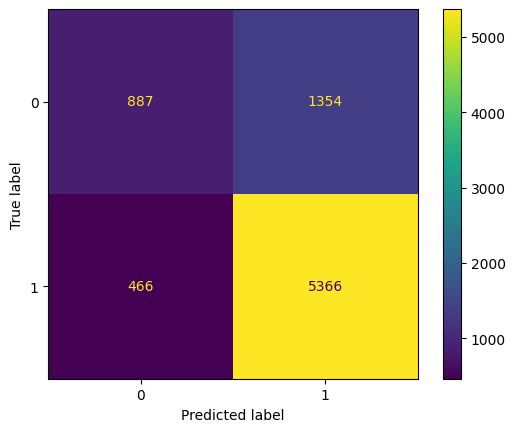

In [44]:
plot_confusion_matrix(lg_model, scaled_X_test, y_test)

In [45]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.40      0.66      0.49      1353
           1       0.92      0.80      0.86      6720

    accuracy                           0.77      8073
   macro avg       0.66      0.73      0.67      8073
weighted avg       0.83      0.77      0.79      8073



In [46]:
lg_model.coef_

array([[ 1.28101718,  0.08512301, -1.5208023 , -0.00827718,  0.13144325,
        -0.13346599,  0.2661595 , -0.17334308,  0.17662747]])

## Random Forest
#### The second model we will use

In [47]:
rf_df = games_df.copy()

rf_df["diff"] = rf_df["p1_rank"] - rf_df["p2_rank"]
rf_df

,p1_rank,p1_home,p2_rank,p2_home,p1_prevwins,p2_prevwins,p1_form,p2_form,diff_positive,is_p1_win,diff
0,1807.8,1.0,1712.4,0.0,8,1,7.5,-21.0,1,0,95.4
1,1800.3,0.0,1071.1,1.0,2,0,6.0,-2.0,1,1,729.2
2,1800.3,0.0,1133.6,1.0,1,0,6.0,-3.0,1,1,666.7
3,1800.3,1.0,1057.6,0.0,1,0,3.0,-1.0,1,1,742.7
4,1800.3,1.0,1368.9,0.0,7,0,1.5,0.0,1,1,431.4
...,...,...,...,...,...,...,...,...,...,...,...
40356,0.0,1.0,435.5,0.0,0,0,0.0,0.0,0,1,-435.5
40357,0.0,1.0,424.0,0.0,0,0,0.0,0.0,0,1,-424.0
40358,0.0,1.0,331.0,0.0,0,0,0.0,0.0,0,0,-331.0
40359,0.0,1.0,307.0,0.0,0,0,0.0,0.0,0,1,-307.0


In [48]:
rf_df = rf_df[
    ((rf_df["diff"] >= -80) | ((rf_df["diff"] < -80) & rf_df["is_p1_win"] == 0))
]
rf_df["is_p1_win"].value_counts()

1    27391
0    11190
Name: is_p1_win, dtype: int64

In [49]:
r_X = rf_df.drop("is_p1_win", axis=1)
r_y = rf_df["is_p1_win"]

In [50]:
temp_x = r_X.copy()
temp_x["diff"] = temp_x["p1_rank"] - temp_x["p2_rank"]
temp_x = temp_x[["diff", "p1_form", "p2_form", "p1_prevwins", "p2_prevwins"]]


temp_x

,diff,p1_form,p2_form,p1_prevwins,p2_prevwins
0,95.4,7.5,-21.0,8,1
1,729.2,6.0,-2.0,2,0
2,666.7,6.0,-3.0,1,0
3,742.7,3.0,-1.0,1,0
4,431.4,1.5,0.0,7,0
...,...,...,...,...,...
40353,-27.5,-3.0,0.0,1,0
40354,-161.0,0.0,-4.0,0,0
40355,-4.7,0.0,0.0,0,0
40358,-331.0,0.0,0.0,0,0


In [51]:
temp_y = r_y
temp_y

0        0
1        1
2        1
3        1
4        1
        ..
40353    1
40354    0
40355    0
40358    0
40360    0
Name: is_p1_win, Length: 38581, dtype: int64

In [52]:
scaler_temp = StandardScaler()
X_temp_train, X_temp_test, y_temp_train, y_temp_test = train_test_split(
    temp_x, temp_y, test_size=0.1
)

In [53]:
rf_model = RandomForestClassifier(n_estimators=1500, max_features="auto")

In [54]:
rf_model.fit(X_temp_train, y_temp_train)

RandomForestClassifier(n_estimators=1500)

In [55]:
rf_predicitons = rf_model.predict(X_temp_test)

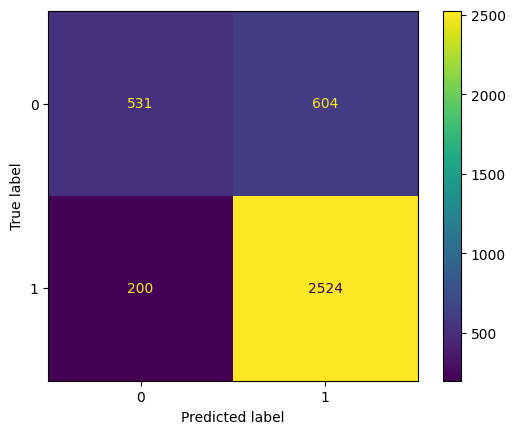

In [56]:
plot_confusion_matrix(rf_model, X_temp_test, y_temp_test)

In [57]:
confusion_matrix(y_temp_test, rf_predicitons)

array([[ 531,  604],
       [ 200, 2524]], dtype=int64)

In [58]:
print(classification_report(rf_predicitons, y_temp_test))

              precision    recall  f1-score   support

           0       0.47      0.73      0.57       731
           1       0.93      0.81      0.86      3128

    accuracy                           0.79      3859
   macro avg       0.70      0.77      0.72      3859
weighted avg       0.84      0.79      0.81      3859



In [60]:
game = {
    "diff": [160],
    "p1_prevwins": [0],
    "p2_prevwins": [0],
    "p1_form": [0],
    "p2_form": [0],
}

df = pd.DataFrame.from_dict(game)
score = rf_model.predict(df)
score

array([1], dtype=int64)

## Trying different approach

In [62]:
games_df = pd.read_csv("games_analyzed_table.csv", sep=",")
games_df.fillna(0, inplace=True)
games_df["is_p1_win"] = games_df["p1_win"]

In [63]:
X2 = games_df[["points_diff", "p1_prevwins", "p2_prevwins"]]
y2 = games_df["is_p1_win"]
scaler2 = StandardScaler()
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.1, random_state=42
)

In [64]:
scaled_X_train2 = scaler2.fit_transform(X_train2)
scaled_X_test2 = scaler2.transform(X_test2)

In [65]:
lg_model2 = LogisticRegressionCV()

In [66]:
lg_model2.fit(scaled_X_train2, y_train2)

LogisticRegressionCV()

In [67]:
predictions2 = lg_model2.predict(scaled_X_test2)

In [68]:
confusion_matrix(predictions2, y_test2)

array([[ 369,  190],
       [ 743, 2735]], dtype=int64)

In [69]:
print(classification_report(predictions2, y_test2))

              precision    recall  f1-score   support

           0       0.33      0.66      0.44       559
           1       0.94      0.79      0.85      3478

    accuracy                           0.77      4037
   macro avg       0.63      0.72      0.65      4037
weighted avg       0.85      0.77      0.80      4037



## SVM

In [73]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [74]:
svc = SVC(class_weight="balanced")

In [75]:
params = {"C": [0.001, 0.01, 0.1, 0.5, 1], "gamma": ["scale", "auto"]}

In [76]:
grid = GridSearchCV(svc, params)

In [78]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [79]:
grid.best_params_

{'C': 0.01, 'gamma': 'auto'}

In [80]:
svm_predictions = grid.predict(scaled_X_test)

In [81]:
confusion_matrix(svm_predictions, y_test)

array([[1251, 1128],
       [ 990, 4704]], dtype=int64)

In [82]:
print(classification_report(svm_predictions, y_test))

              precision    recall  f1-score   support

           0       0.56      0.53      0.54      2379
           1       0.81      0.83      0.82      5694

    accuracy                           0.74      8073
   macro avg       0.68      0.68      0.68      8073
weighted avg       0.73      0.74      0.74      8073



## Adaptive Boost Model

In [83]:
from sklearn.ensemble import AdaBoostClassifier

In [84]:
ad_model = AdaBoostClassifier(n_estimators=1000)

In [85]:
ad_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1000)

In [86]:
ad_predictions = ad_model.predict(X_test)

In [87]:
confusion_matrix(ad_predictions, y_test)

array([[ 914,  485],
       [1327, 5347]], dtype=int64)

In [88]:
print(classification_report(ad_predictions, y_test))

              precision    recall  f1-score   support

           0       0.41      0.65      0.50      1399
           1       0.92      0.80      0.86      6674

    accuracy                           0.78      8073
   macro avg       0.66      0.73      0.68      8073
weighted avg       0.83      0.78      0.79      8073

